In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("bank.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

DATA IS HIGHLY IMBALANCED

In [8]:
df.pivot_table(values = "age", columns = "y",index = "job",aggfunc="mean")

y,no,yes
job,,
admin.,39.471429,41.206897
blue-collar,40.273660,38.666667
entrepreneur,41.993464,42.200000
housemaid,47.571429,45.714286
management,40.763723,39.114504
retired,60.215909,67.259259
self-employed,40.950920,45.550000
services,38.641161,37.868421
student,27.584615,24.210526


<AxesSubplot:xlabel='marital,y'>

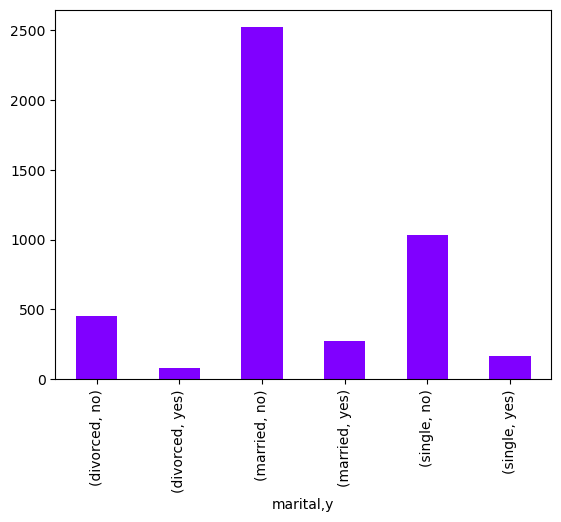

In [9]:
df.groupby(["marital","y"])["age"].count().plot(kind = "bar",cmap = "rainbow" )

In [10]:
df[["day", "month","pdays"]].head(5)

,day,month,pdays
0,19,oct,-1
1,11,may,339
2,16,apr,330
3,3,jun,-1
4,5,may,-1


As we can see the previous days has include all the information regarding when the last contact was done. So we do not need rest of two columns (day & month)

In [11]:
abc = df.copy()

In [12]:
abc.drop(["day","month"],axis =1, inplace = True)

In [15]:
for i in abc.columns: #unknown changed by null/no info given
    abc[i] = np.where(abc[i] == "unknown", np.nan, abc[i])
abc.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [16]:
(3705/abc.poutcome.shape[0])*100

81.95089581950896

In [17]:
(1324/abc.contact.shape[0])*100

29.285556292855563

As we can see the poutcome has 3705 values null after replacing the unknown with null values. And we will not impute them because the percentage of null values is higher. So we decide to drop this feature

In [18]:
abc.drop("poutcome", inplace = True, axis = 1)

In [19]:
abc.drop("contact", inplace = True, axis = 1) #high null values

In [20]:
abc["education"].replace({'primary':0, 'secondary':1, 'tertiary':2},inplace = True)
abc["default"].replace({'no':0, 'yes':1},inplace = True)
abc["marital"].replace({'single':0, 'married':1, 'divorced':2},inplace = True)
abc["housing"].replace({'no':0, 'yes':1},inplace = True)
abc["loan"].replace({'no':0, 'yes':1},inplace = True)

In [21]:
abc["job"].fillna(method = "ffill",inplace=True)
abc["education"].fillna(method = "ffill",inplace= True)

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
ohe = OneHotEncoder()
abc[list(abc["job"].unique())] = ohe.fit_transform(abc[["job"]]).A
abc.drop("job",axis = 1, inplace = True)
abc.head(1)

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,1,0.0,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
label = LabelEncoder()
abc["y"] =  label.fit_transform(abc["y"])
abc.head(1)

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,1,0.0,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
import json,pickle
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif, VarianceThreshold
from skfeature.function.similarity_based import fisher_score
from imblearn.over_sampling import SMOTE
pd.set_option("display.max_columns",None)

<AxesSubplot:>

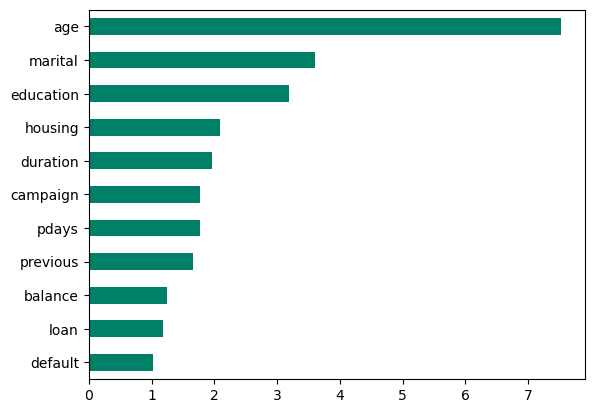

In [27]:
_ = abc[['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous']]
vif_lst = []
for i in range(_.shape[1]):
    vif = variance_inflation_factor(_.to_numpy(),i)
    vif_lst.append(vif)
s1 = pd.Series(vif_lst, index = _.columns)
s1.sort_values().plot(kind = "barh", cmap = "summer")

All features are independent from each other.

<AxesSubplot:>

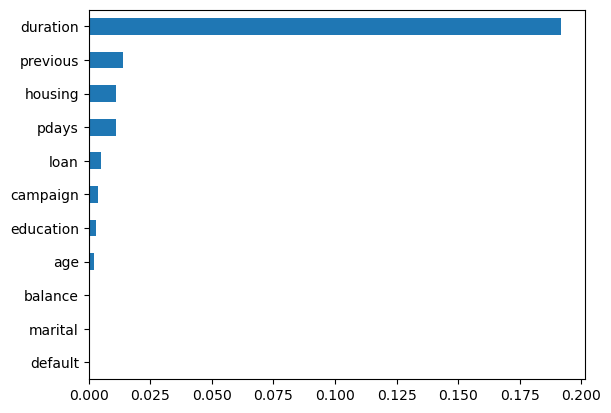

In [29]:
fisher_rank = fisher_score.fisher_score(_.to_numpy(),abc["y"])
s = pd.Series(fisher_rank, index = _.columns)
s.sort_values().plot(kind = "barh")

According to fischer marital is not participating .

In [30]:
var_th = VarianceThreshold(threshold = 0.0)
var_th.fit_transform(_)
s = pd.Series(var_th.get_support(),index = _.columns)
s

age          True
marital      True
education    True
default      True
balance      True
housing      True
loan         True
duration     True
campaign     True
pdays        True
previous     True
dtype: bool

All features are good predictors.

In [32]:
_temp = abc[['marital', 'education', 'default', 'housing', 'loan',
        'campaign', 'previous']]
chi, p_val = chi2(_temp,abc["y"])
s = pd.DataFrame({"Chi2":np.around(chi,2), "P_val": np.around(p_val,2)}, index = _temp.columns)
s

,Chi2,P_val
marital,0.43,0.51
education,5.14,0.02
default,0.01,0.93
housing,21.50,0.00
loan,19.05,0.00
campaign,58.50,0.00
previous,325.48,0.00


marital and default features are not important for the model.

In [34]:
_temp = abc[['age', 'balance', 'duration', 'pdays']]
f_val,p_val = f_classif(_temp,abc["y"])
pd.DataFrame({"F_Val": np.around(f_val,2), "P_val": np.around(p_val,2)},index = _temp.columns)

,F_Val,P_val
age,9.21,0.00
balance,1.45,0.23
duration,866.51,0.00
pdays,49.50,0.00


balance feature is not that important.

We decide to drop marital feature as it not a good predictor.

In [35]:
x = abc.drop("y",axis = 1)
y = abc["y"]

In [36]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve,classification_report,roc_curve, confusion_matrix


In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)


In [38]:
sm = SMOTE(sampling_strategy=0.75)
sm_x,sm_y = sm.fit_resample(x_train,y_train)

In [39]:
print(f"First we have the value counts:\n{y_train.value_counts()}\n\nAfter OverSampling now we have value counts:\n{sm_y.value_counts()}")

First we have the value counts:
0    3199
1     417
Name: y, dtype: int64

After OverSampling now we have value counts:
0    3199
1    2399
Name: y, dtype: int64


In [40]:
std = StandardScaler()
arr = std.fit_transform(sm_x)
std_x = pd.DataFrame(arr, columns = sm_x.columns)
std_x.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,-0.898017,2.097839,-0.301824,8.822985,-0.569578,1.143877,-0.337355,-0.624806,0.141456,-0.475149,-0.419572,3.013880,-0.497199,-0.200744,-0.171464,-0.590257,-0.279017,-0.212428,-0.325472,-0.178561,-0.484126,-0.185635
1,-0.708073,-1.245088,1.300919,-0.113340,-0.507818,1.143877,2.964239,-0.773577,-0.588720,0.365677,10.790721,-0.382917,-0.497199,-0.200744,-0.171464,-0.590257,-0.279017,-0.212428,-0.325472,-0.178561,2.349400,-0.185635
2,0.241647,2.097839,1.300919,-0.113340,-0.562716,-0.874220,-0.337355,-0.919432,-0.223632,-0.475149,-0.419572,-0.382917,-0.497199,-0.200744,-0.171464,1.954901,-0.279017,-0.212428,-0.325472,-0.178561,-0.484126,-0.185635
3,-0.708073,0.426375,-0.301824,-0.113340,2.604967,1.143877,2.964239,-0.931100,-0.588720,-0.475149,-0.419572,-0.382917,2.204121,-0.200744,-0.171464,-0.590257,-0.279017,-0.212428,-0.325472,-0.178561,-0.484126,-0.185635
4,0.906450,0.426375,-1.904567,-0.113340,1.362522,-0.874220,2.964239,-0.858173,1.601808,-0.475149,-0.419572,-0.382917,2.204121,-0.200744,-0.171464,-0.590257,-0.279017,-0.212428,-0.325472,-0.178561,-0.484126,-0.185635


In [41]:
arr1 = std.transform(x_test)
std_x_te = pd.DataFrame(arr1, columns = x_test.columns)
std_x_te.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,unemployed,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,1.666226,0.426375,-1.904567,-0.11334,0.095677,-0.874220,-0.337355,0.381589,0.506544,3.034811,0.760458,-0.382917,-0.497199,-0.200744,-0.171464,1.954901,-0.279017,-0.212428,-0.325472,-0.178561,-0.484126,-0.185635
1,-0.138241,0.426375,-0.301824,-0.11334,-0.521161,-0.874220,-0.337355,0.095715,7.078129,-0.475149,-0.419572,-0.382917,-0.497199,-0.200744,-0.171464,-0.590257,-0.279017,-0.212428,-0.325472,-0.178561,2.349400,-0.185635
2,0.241647,0.426375,-0.301824,-0.11334,-0.395735,1.143877,-0.337355,-0.969022,0.141456,2.497073,0.170443,-0.382917,-0.497199,-0.200744,-0.171464,1.954901,-0.279017,-0.212428,-0.325472,-0.178561,-0.484126,-0.185635
3,-1.182932,0.426375,-1.904567,-0.11334,-0.601602,-0.874220,-0.337355,-0.686065,-0.588720,-0.475149,-0.419572,-0.382917,-0.497199,-0.200744,-0.171464,-0.590257,-0.279017,-0.212428,3.446871,-0.178561,-0.484126,-0.185635
4,1.096394,0.426375,1.300919,-0.11334,-0.507055,-0.874220,-0.337355,-0.639391,-0.588720,-0.475149,-0.419572,-0.382917,-0.497199,-0.200744,-0.171464,1.954901,-0.279017,-0.212428,-0.325472,-0.178561,-0.484126,-0.185635


In [42]:
lst = [("LogisticRegression",LogisticRegression()),
       ("KNN Classifier", KNeighborsClassifier()),
       ("RandomForest",RandomForestClassifier()),
      ("AdaBoost",AdaBoostClassifier()),
      ("XGBoost",XGBClassifier())]
for name,model in lst:
    model.fit(std_x,sm_y)
    y1 = model.predict(std_x)
    accuracy = accuracy_score(sm_y,y1)
    y2 = model.predict(std_x_te)
    acc_te = accuracy_score(y_test,y2)
    print(f"For {name}::\nThe Training Accuracy is: {accuracy}\nThe Testing Accuracy is: {acc_te}")
    print("--"*40)

For LogisticRegression::
The Training Accuracy is: 0.8290460878885316
The Testing Accuracy is: 0.8243093922651934
--------------------------------------------------------------------------------
For KNN Classifier::
The Training Accuracy is: 0.927652733118971
The Testing Accuracy is: 0.8342541436464088
--------------------------------------------------------------------------------
For RandomForest::
The Training Accuracy is: 1.0
The Testing Accuracy is: 0.8839779005524862
--------------------------------------------------------------------------------
For AdaBoost::
The Training Accuracy is: 0.9135405501964987
The Testing Accuracy is: 0.8751381215469614
--------------------------------------------------------------------------------
For XGBoost::
The Training Accuracy is: 0.9962486602357985
The Testing Accuracy is: 0.8707182320441988
--------------------------------------------------------------------------------


we will move forward with xgbclassifier model.

In [43]:
estimator = XGBClassifier()
parameters = {"n_estimators": [50,100,150,200,250,300,350,400],
             "max_depth": np.arange(2,10),
             "learning_rate": np.arange(0.01,0.1,0.02),
             'subsample': np.arange(0.5, 1.0, 0.1),
             'colsample_bytree': np.arange(0.4, 1.0, 0.1),
             'colsample_bylevel': np.arange(0.4, 1.0, 0.1)}
rscv = RandomizedSearchCV(estimator, parameters, cv = 5, random_state= 42)
rscv.fit(std_x,sm_y)
rscv.best_params_

{'subsample': 0.7,
 'n_estimators': 150,
 'max_depth': 8,
 'learning_rate': 0.08999999999999998,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.7999999999999999}

In [44]:
xgb = XGBClassifier(subsample = 0.5, n_estimators = 150,
                    max_depth = 7, learning_rate = 0.049999999999999996,
                    colsample_bytree = 0.7999999999999999, colsample_bylevel = 0.5)
xgb.fit(std_x,sm_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.7999999999999999, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.049999999999999996,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
y_pr_train = xgb.predict(std_x)
acc_train = accuracy_score(sm_y,y_pr_train)
class_re = classification_report(sm_y,y_pr_train)
con_mat = confusion_matrix(sm_y,y_pr_train)
print("Confusion Matrix:\n",con_mat)
print("\n")
print("The accuracy of the model:",(acc_train)*100)
print("\n")
print("The classification report:\n",class_re)

Confusion Matrix:
 [[3134   65]
 [ 164 2235]]


The accuracy of the model: 95.9092533047517


The classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      3199
           1       0.97      0.93      0.95      2399

    accuracy                           0.96      5598
   macro avg       0.96      0.96      0.96      5598
weighted avg       0.96      0.96      0.96      5598



In [46]:
y_pr_test = xgb.predict(std_x_te)
acc_test = accuracy_score(y_test,y_pr_test)
class_re1 = classification_report(y_test,y_pr_test)
con_mat1 = confusion_matrix(y_test,y_pr_test)
print("Confusion Matrix:\n",con_mat1)
print("\n")
print("The accuracy of the model:",(acc_test)*100)
print("\n")
print("The classification report:\n",class_re1)

Confusion Matrix:
 [[759  42]
 [ 66  38]]


The accuracy of the model: 88.06629834254144


The classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       801
           1       0.47      0.37      0.41       104

    accuracy                           0.88       905
   macro avg       0.70      0.66      0.67       905
weighted avg       0.87      0.88      0.87       905



Text(0.5, 1.0, 'ROC - AUC CURVE')

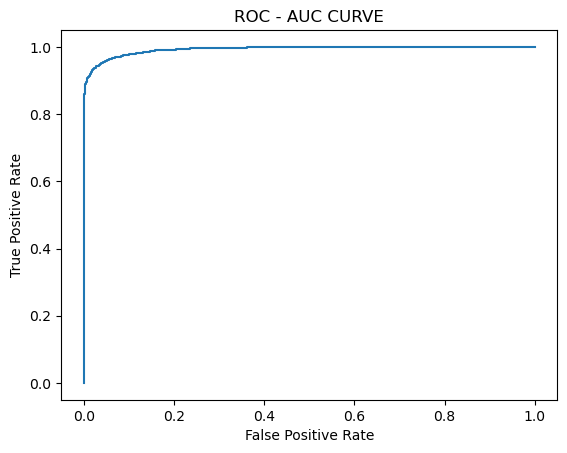

In [47]:
y_prob = xgb.predict_proba(std_x)
y_pr   = y_prob[:,1]
fpr,tpr,threshold = roc_curve(sm_y,y_pr)
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC - AUC CURVE")

NameError: name 'precision_score' is not defined

NameError: name 'sklearn' is not defined